In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-set/diabetes.csv


In [46]:
df= pd.read_csv('/kaggle/input/diabetes-data-set/diabetes.csv')

In [47]:
df.shape

(768, 9)

In [48]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [49]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
df.duplicated().sum()

0

In [51]:
df.describe().round()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [52]:
(df.iloc[: ,:-1]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [53]:
(df.iloc[: ,1:-3]==0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [54]:
df.iloc[: ,1:-3]=df.iloc[: ,1:-3].replace(0, np.nan)

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  
df.iloc[: ,1:-3]=imputer.fit_transform(df.iloc[: ,1:-3])

In [57]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [58]:
df.iloc[: ,1:-3]=df.iloc[: ,1:-3].astype(int)

In [59]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.0,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.0,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.0,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.0,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.0,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.0,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.0,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.0,0.349,47,1


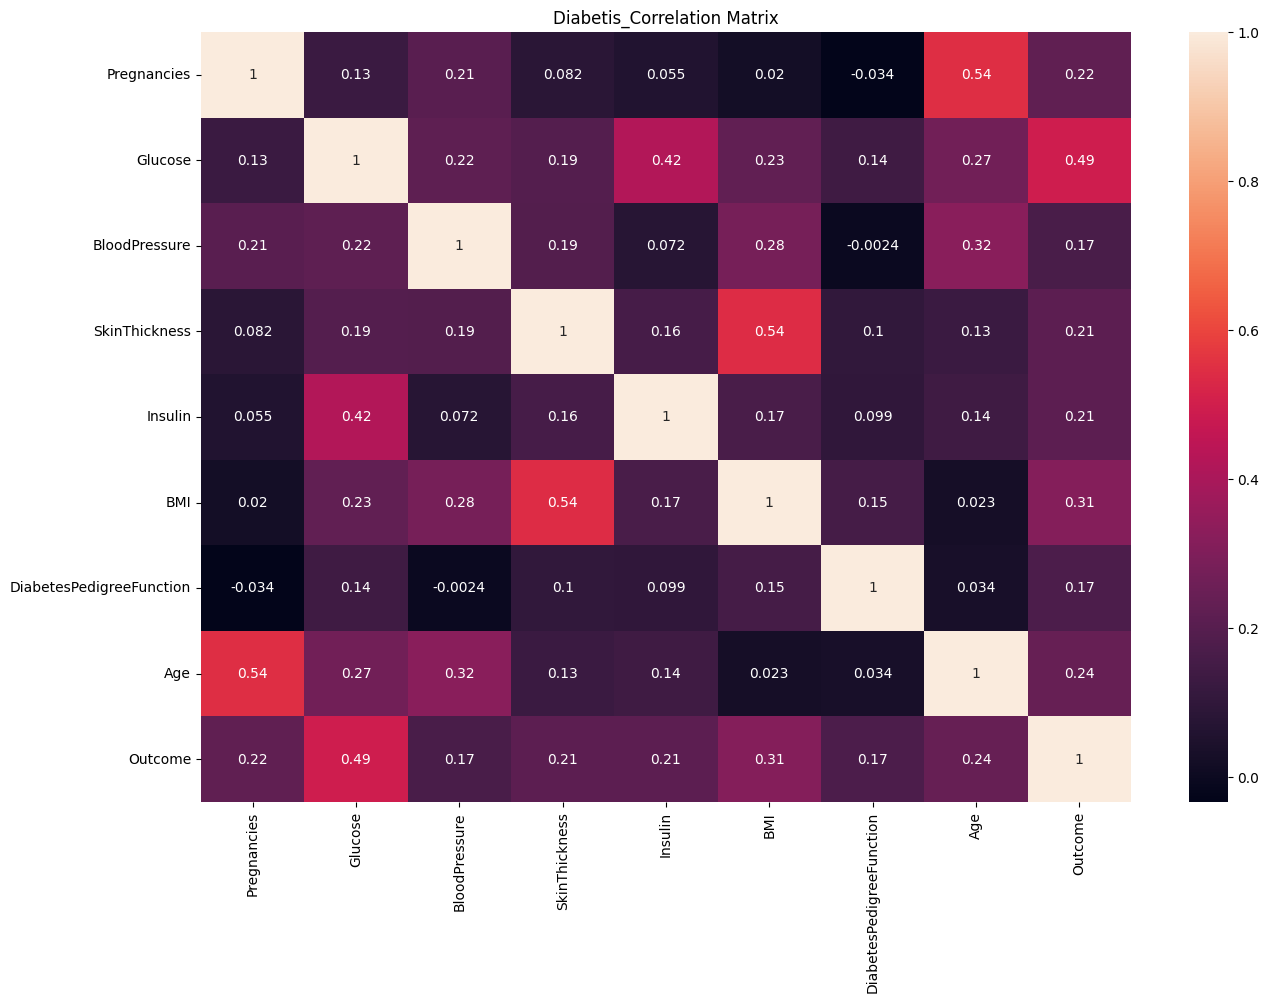

In [60]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Diabetis_Correlation Matrix')
plt.show()

In [61]:
df.corr()['Outcome'].to_frame().sort_values(by='Outcome')

,Outcome
BloodPressure,0.165723
DiabetesPedigreeFunction,0.173844
Insulin,0.214278
SkinThickness,0.214873
Pregnancies,0.221898
Age,0.238356
BMI,0.310895
Glucose,0.492911
Outcome,1.000000


Text(0, 0.5, 'Count')

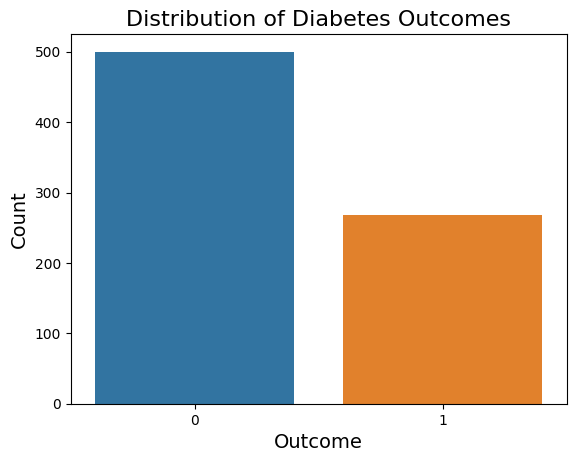

In [62]:
sns.countplot(x='Outcome',data=df)
plt.title('Distribution of Diabetes Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

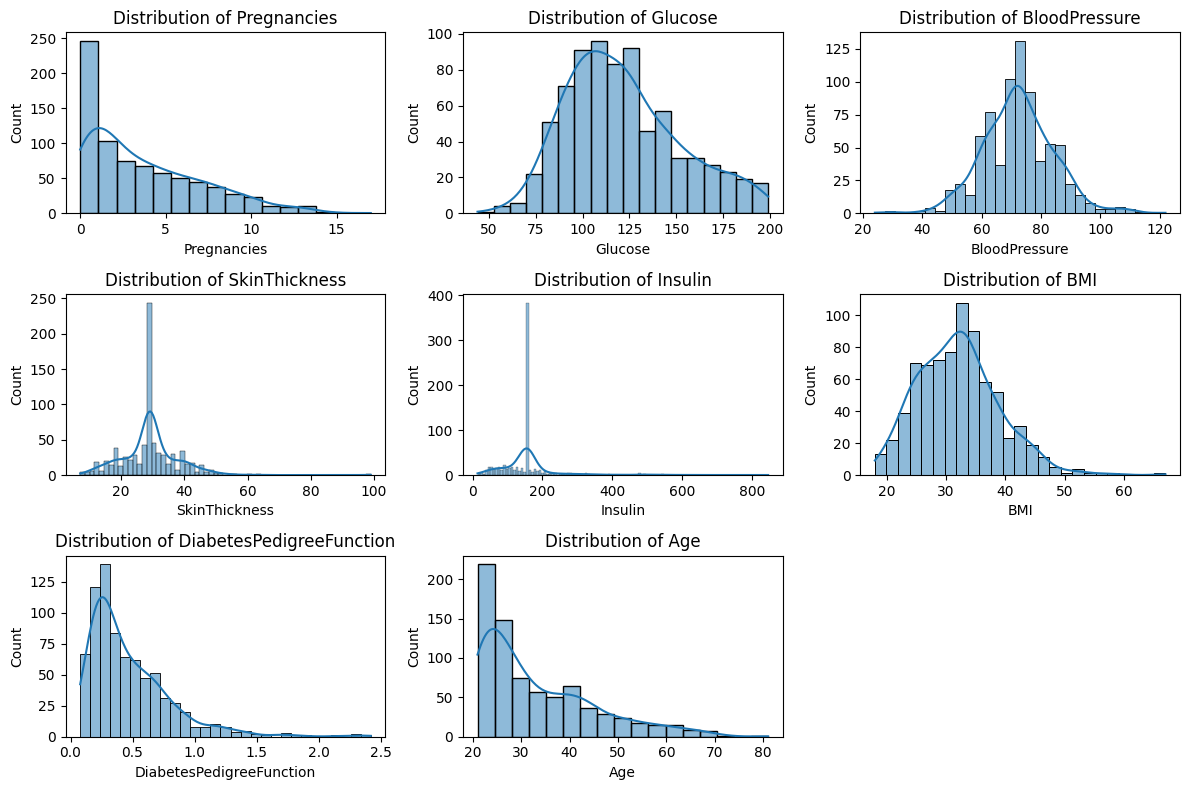

In [63]:

plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1]):  # Ignoring 'Outcome' column
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

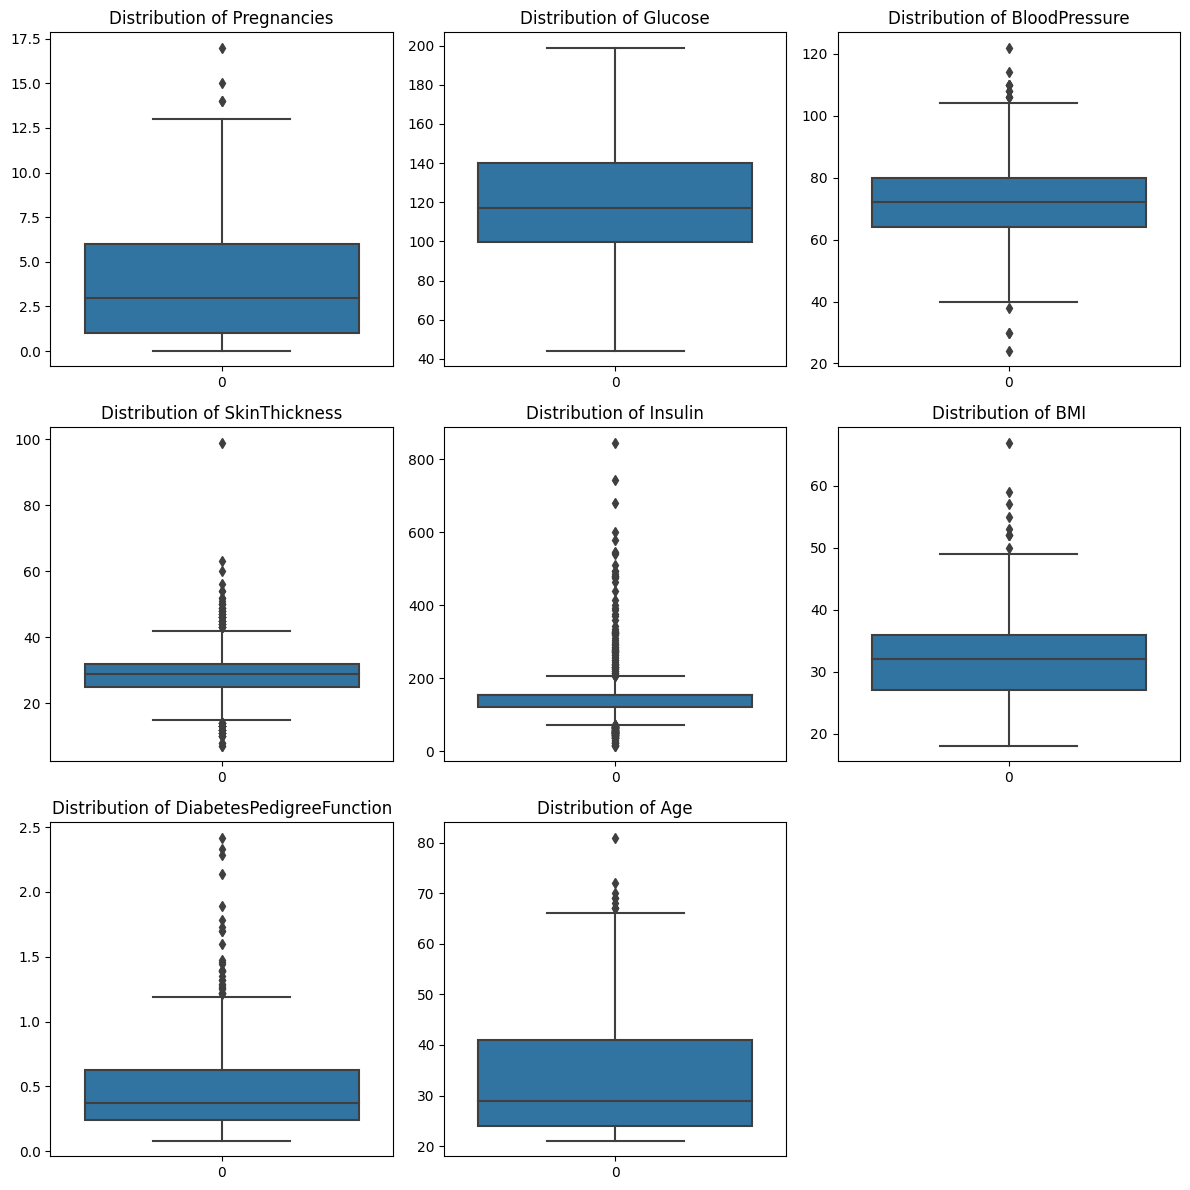

In [64]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.columns[:-1]):  # Ignoring 'Outcome' column
    plt.subplot(3, 3, i+1)
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [65]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.0,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.0,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.0,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.0,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.0,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.0,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.0,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.0,0.349,47,1


In [66]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

Text(0, 0.5, 'Count')

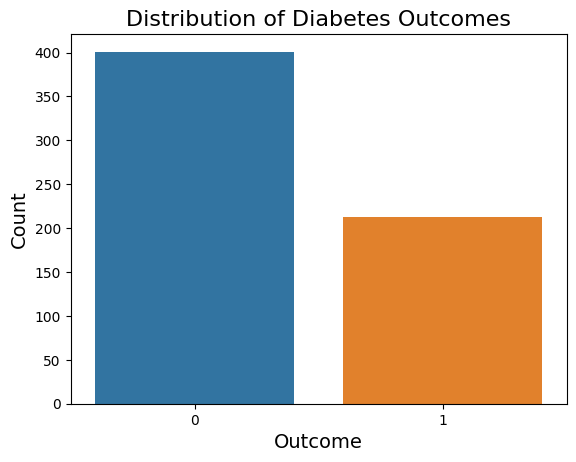

In [68]:
sns.countplot(x=y_train)
plt.title('Distribution of Diabetes Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)


In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

Text(0, 0.5, 'Count')

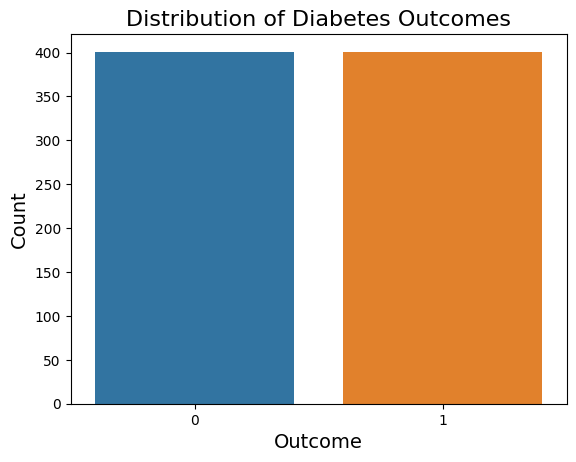

In [70]:
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Diabetes Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
X_standardized = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train_resampled.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

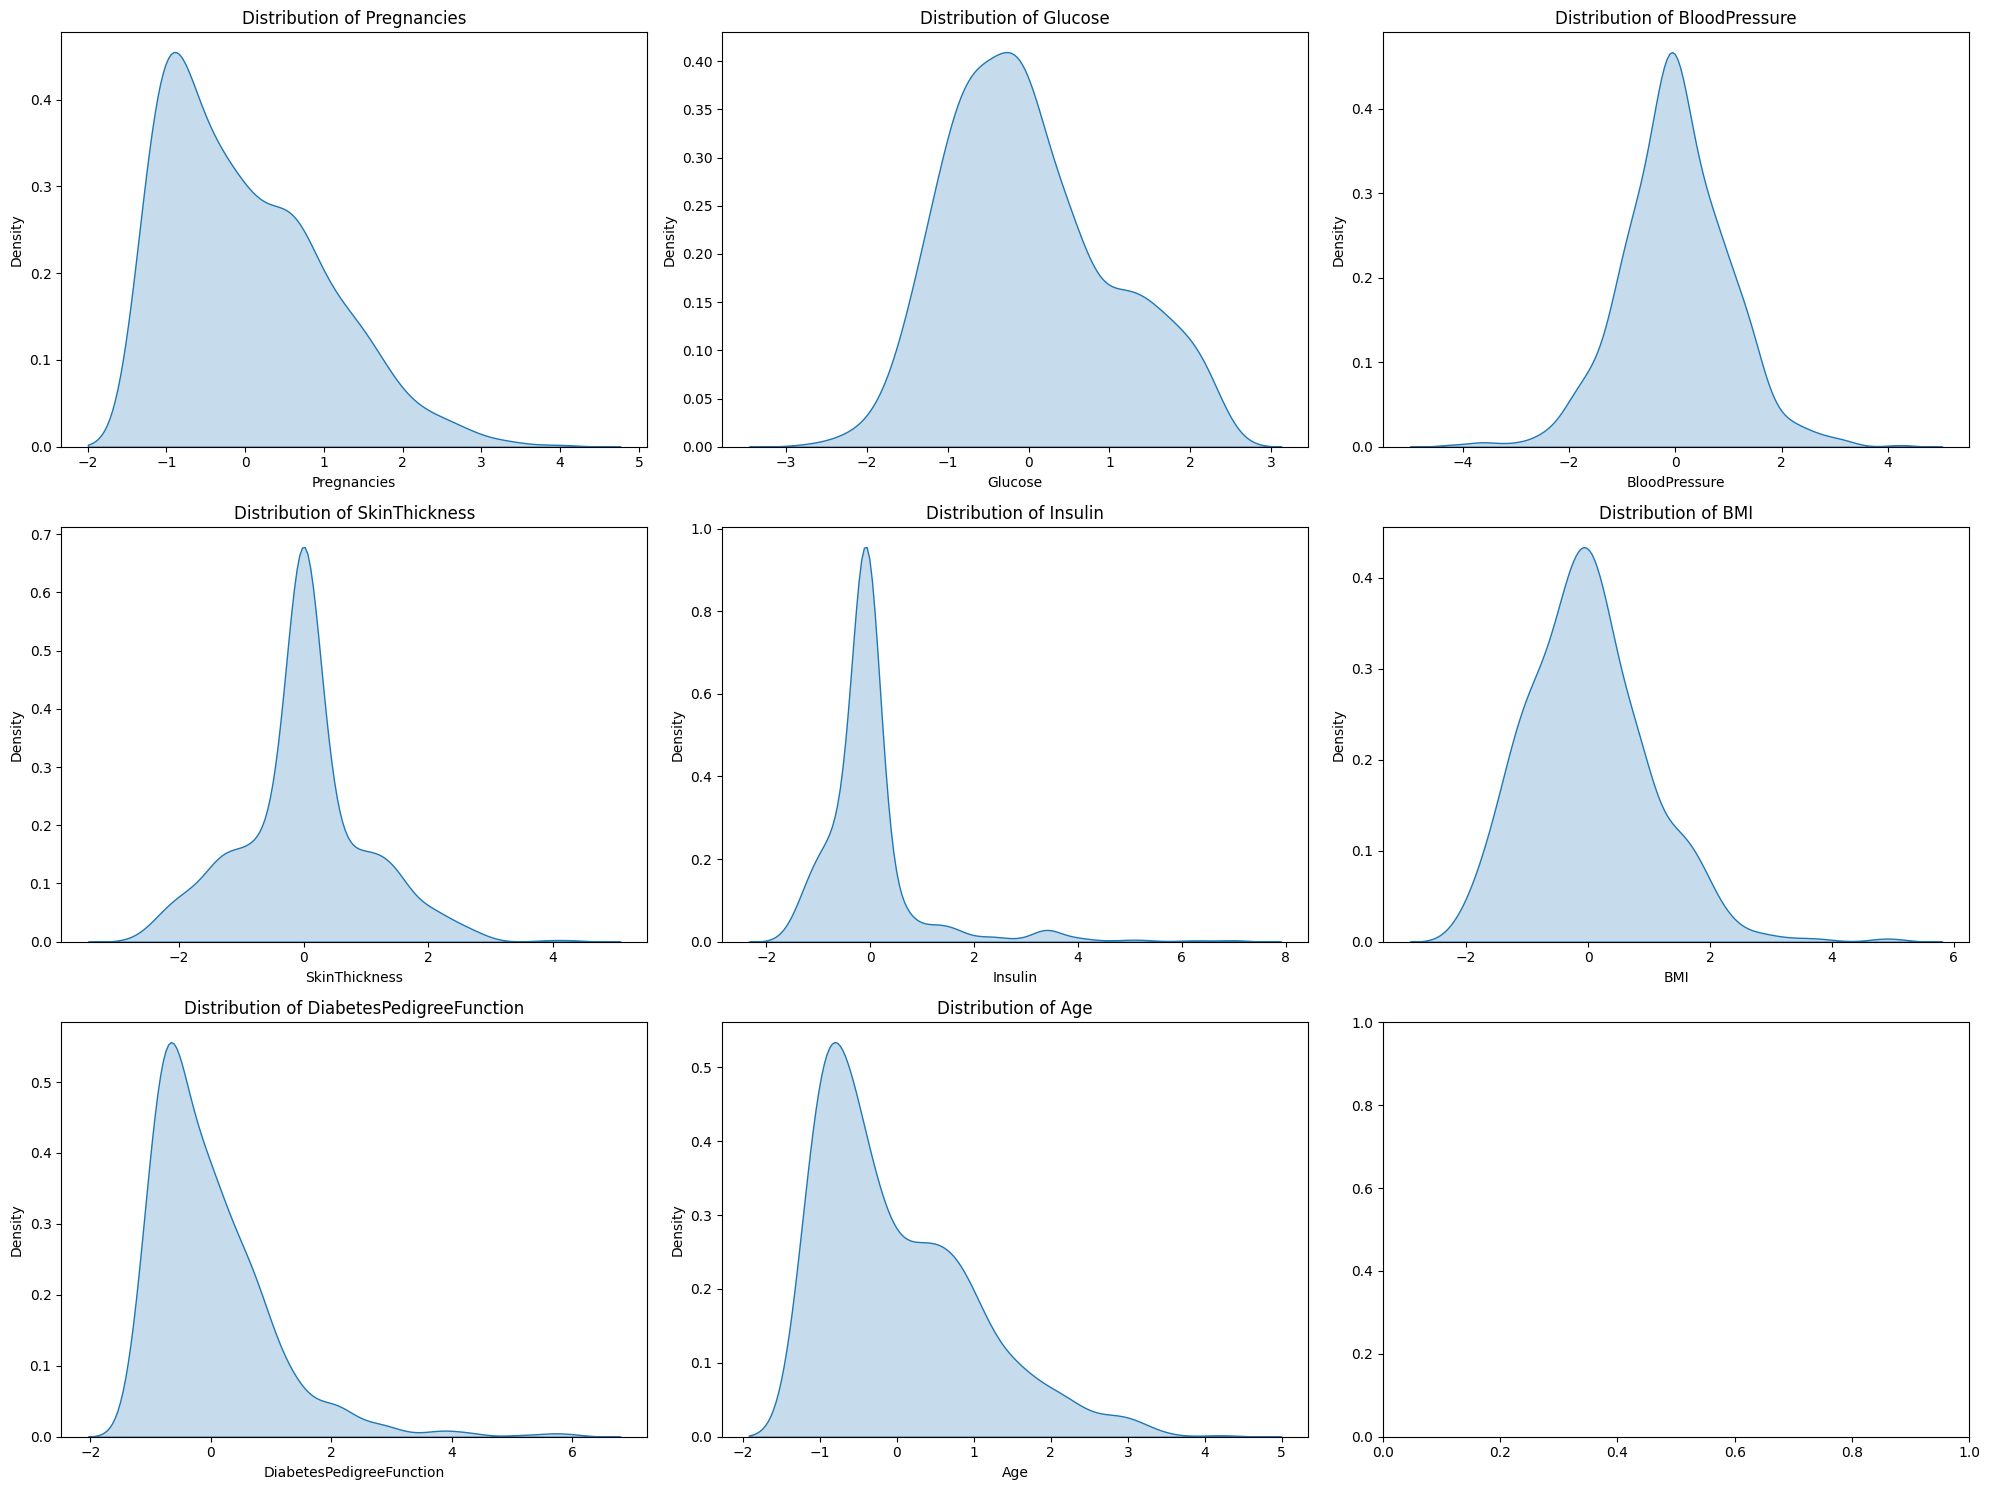

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot distribution curves for each feature
for i, col in enumerate(X_standardized.columns):
    sns.kdeplot(data=X_standardized, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [73]:
scaler = MinMaxScaler()
X_minmax = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train_resampled.columns)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

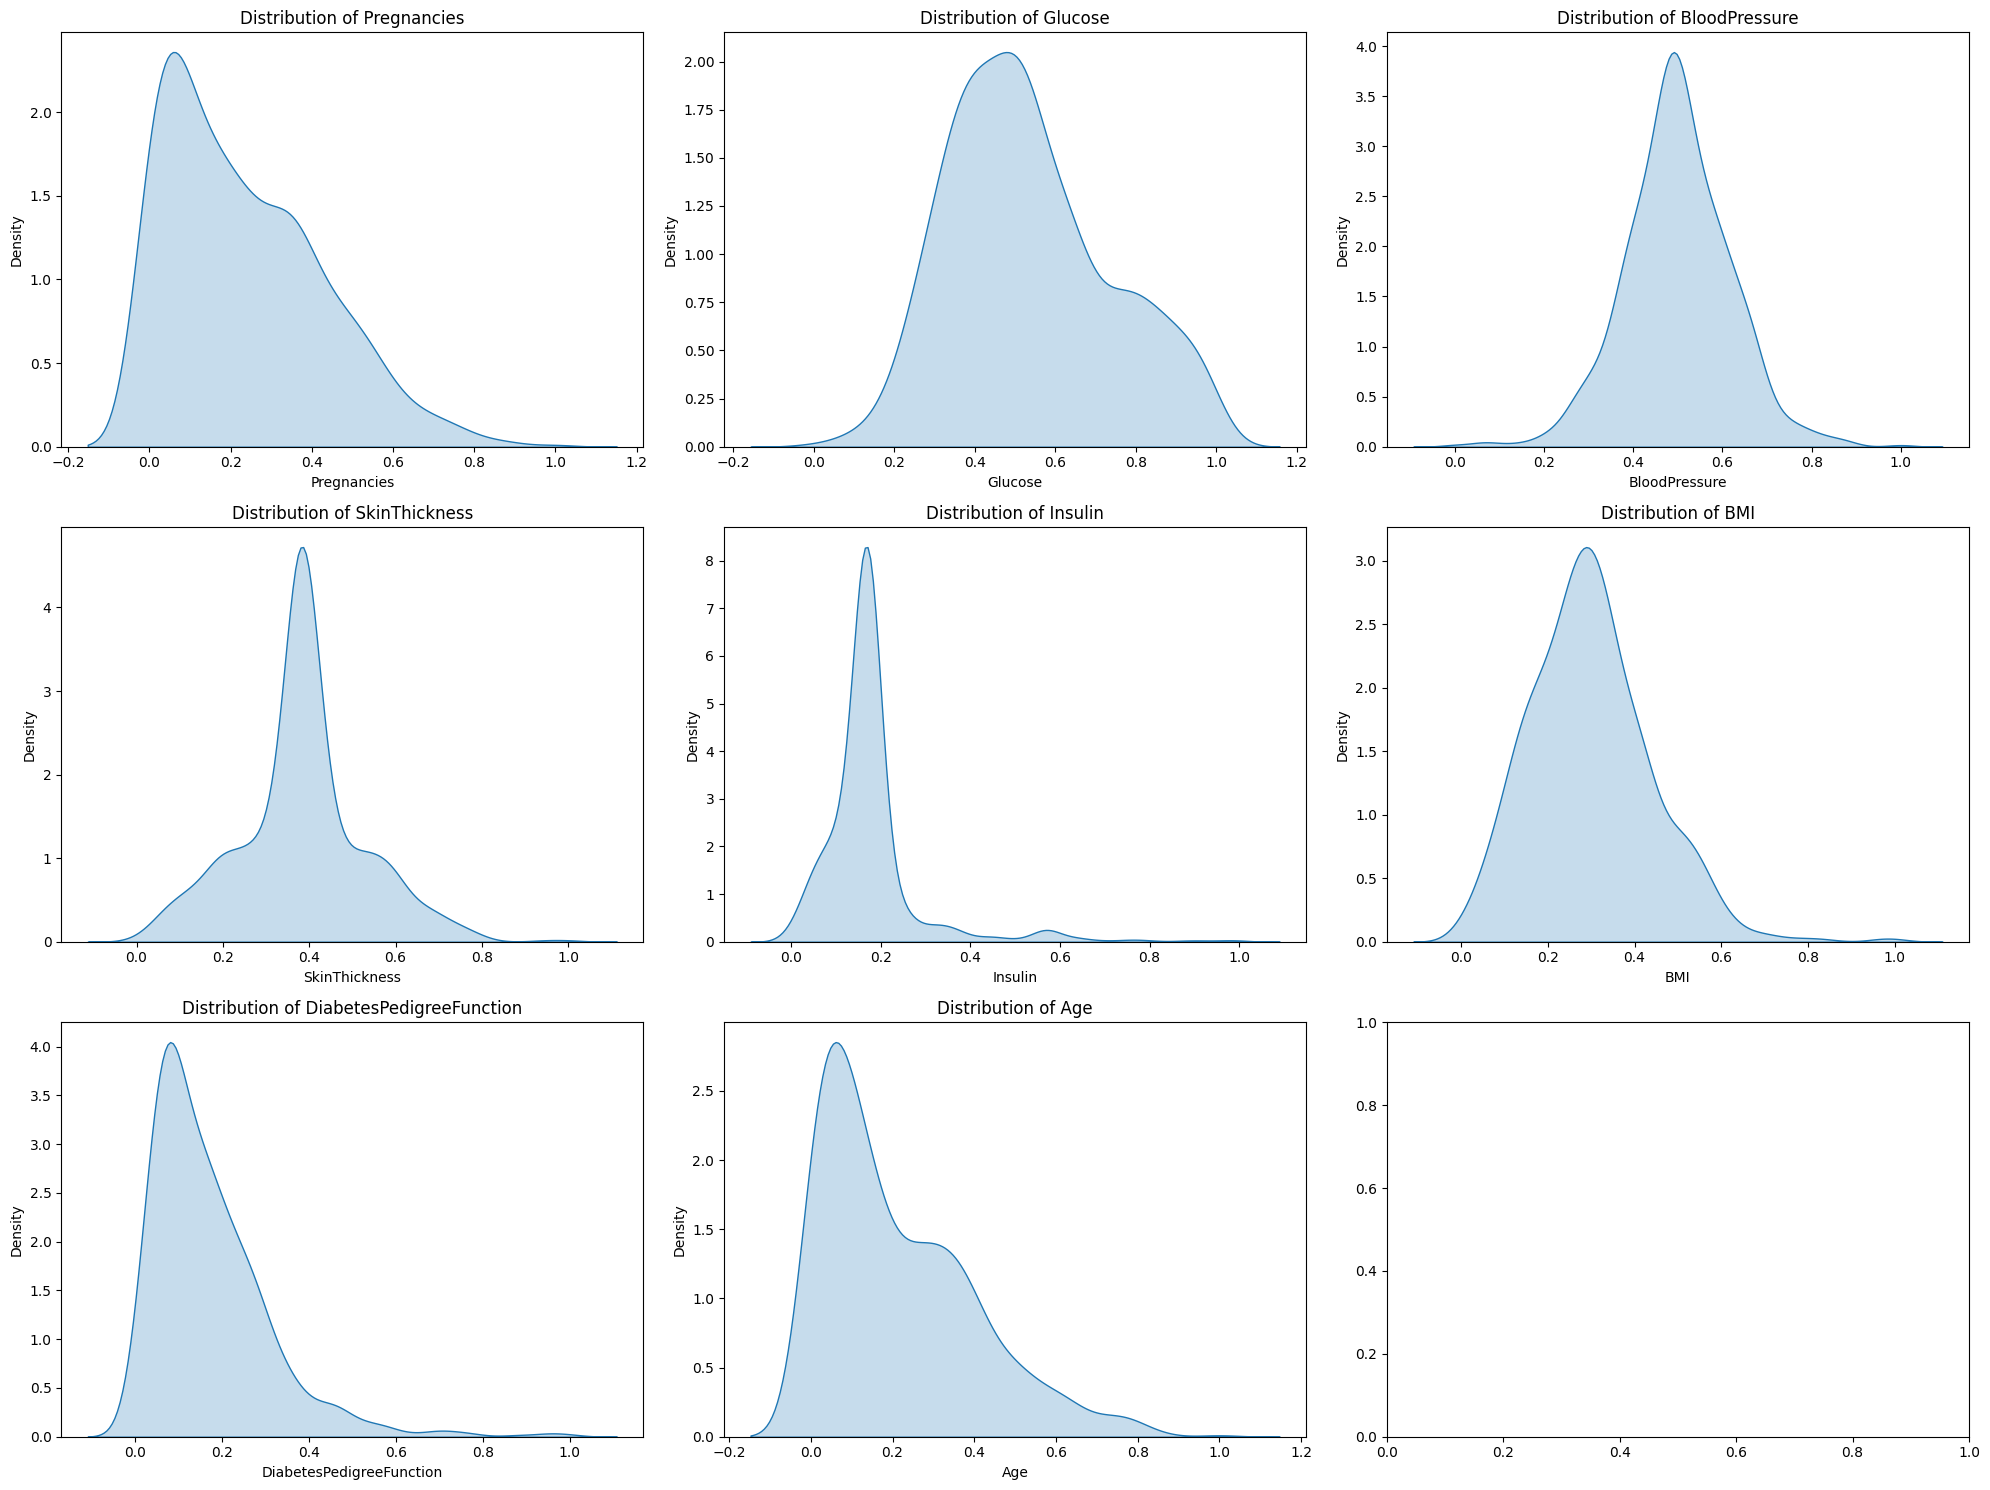

In [74]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot distribution curves for each feature
for i, col in enumerate(X_minmax.columns):
    sns.kdeplot(data=X_minmax, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [75]:
scaler = RobustScaler()
X_robust =  pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train_resampled.columns)

In [ ]:
x_test_transformed = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

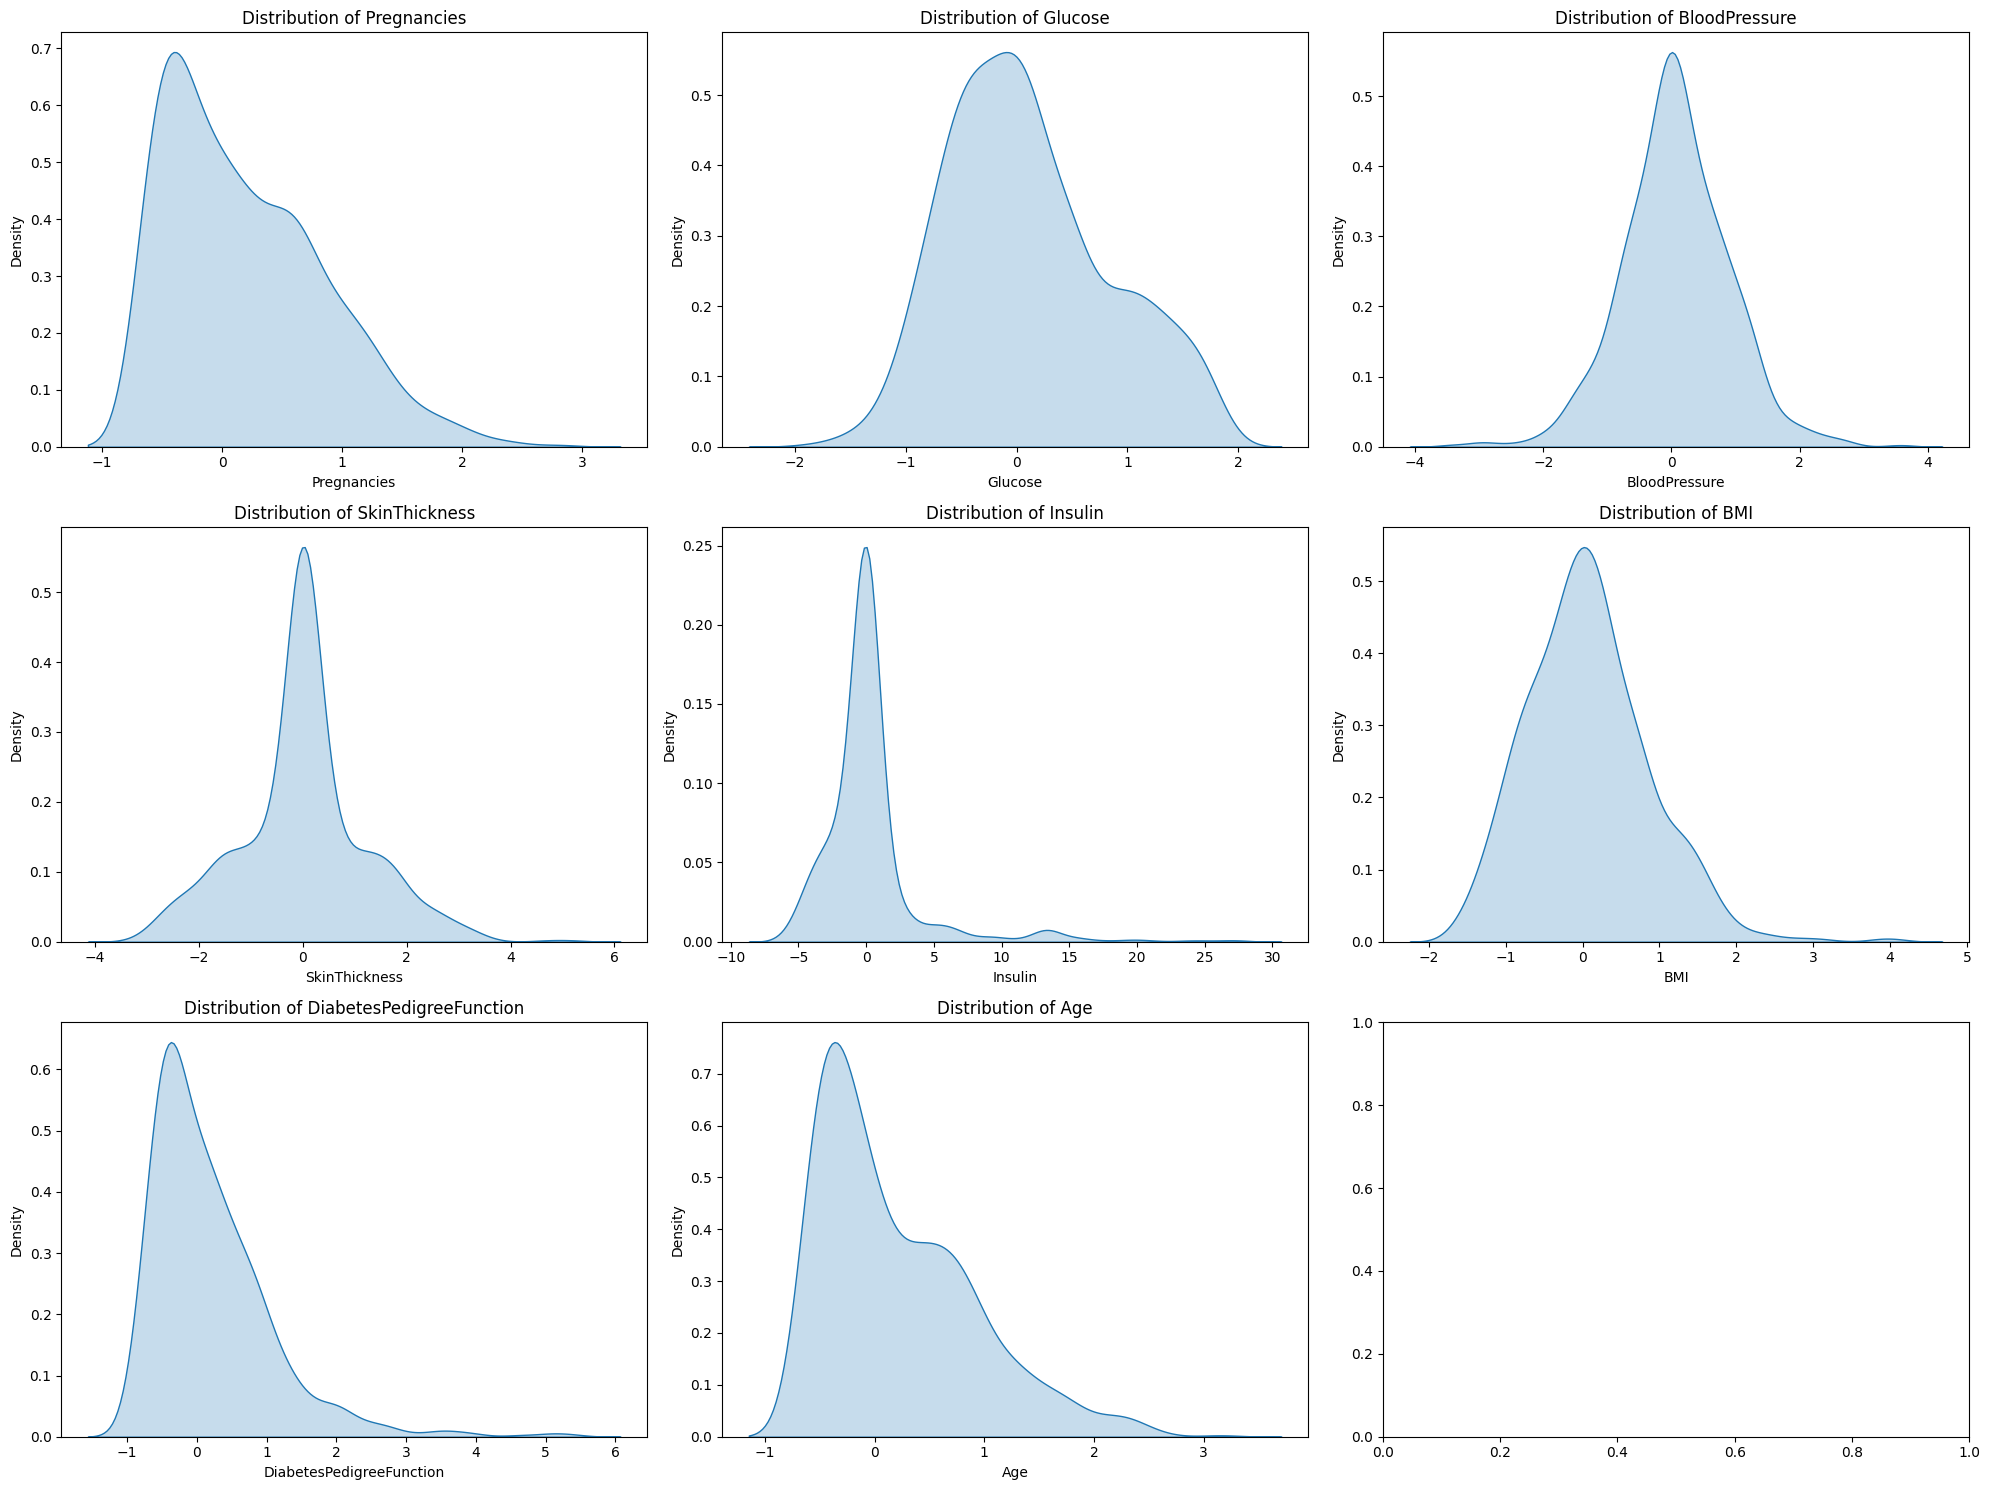

In [76]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot distribution curves for each feature
for i, col in enumerate(X_robust.columns):
    sns.kdeplot(data=X_robust, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [77]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')  # You can also use 'yeo-johnson'
X_transformed = pd.DataFrame(pt.fit_transform(X_train_resampled), columns=X_train_resampled.columns)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

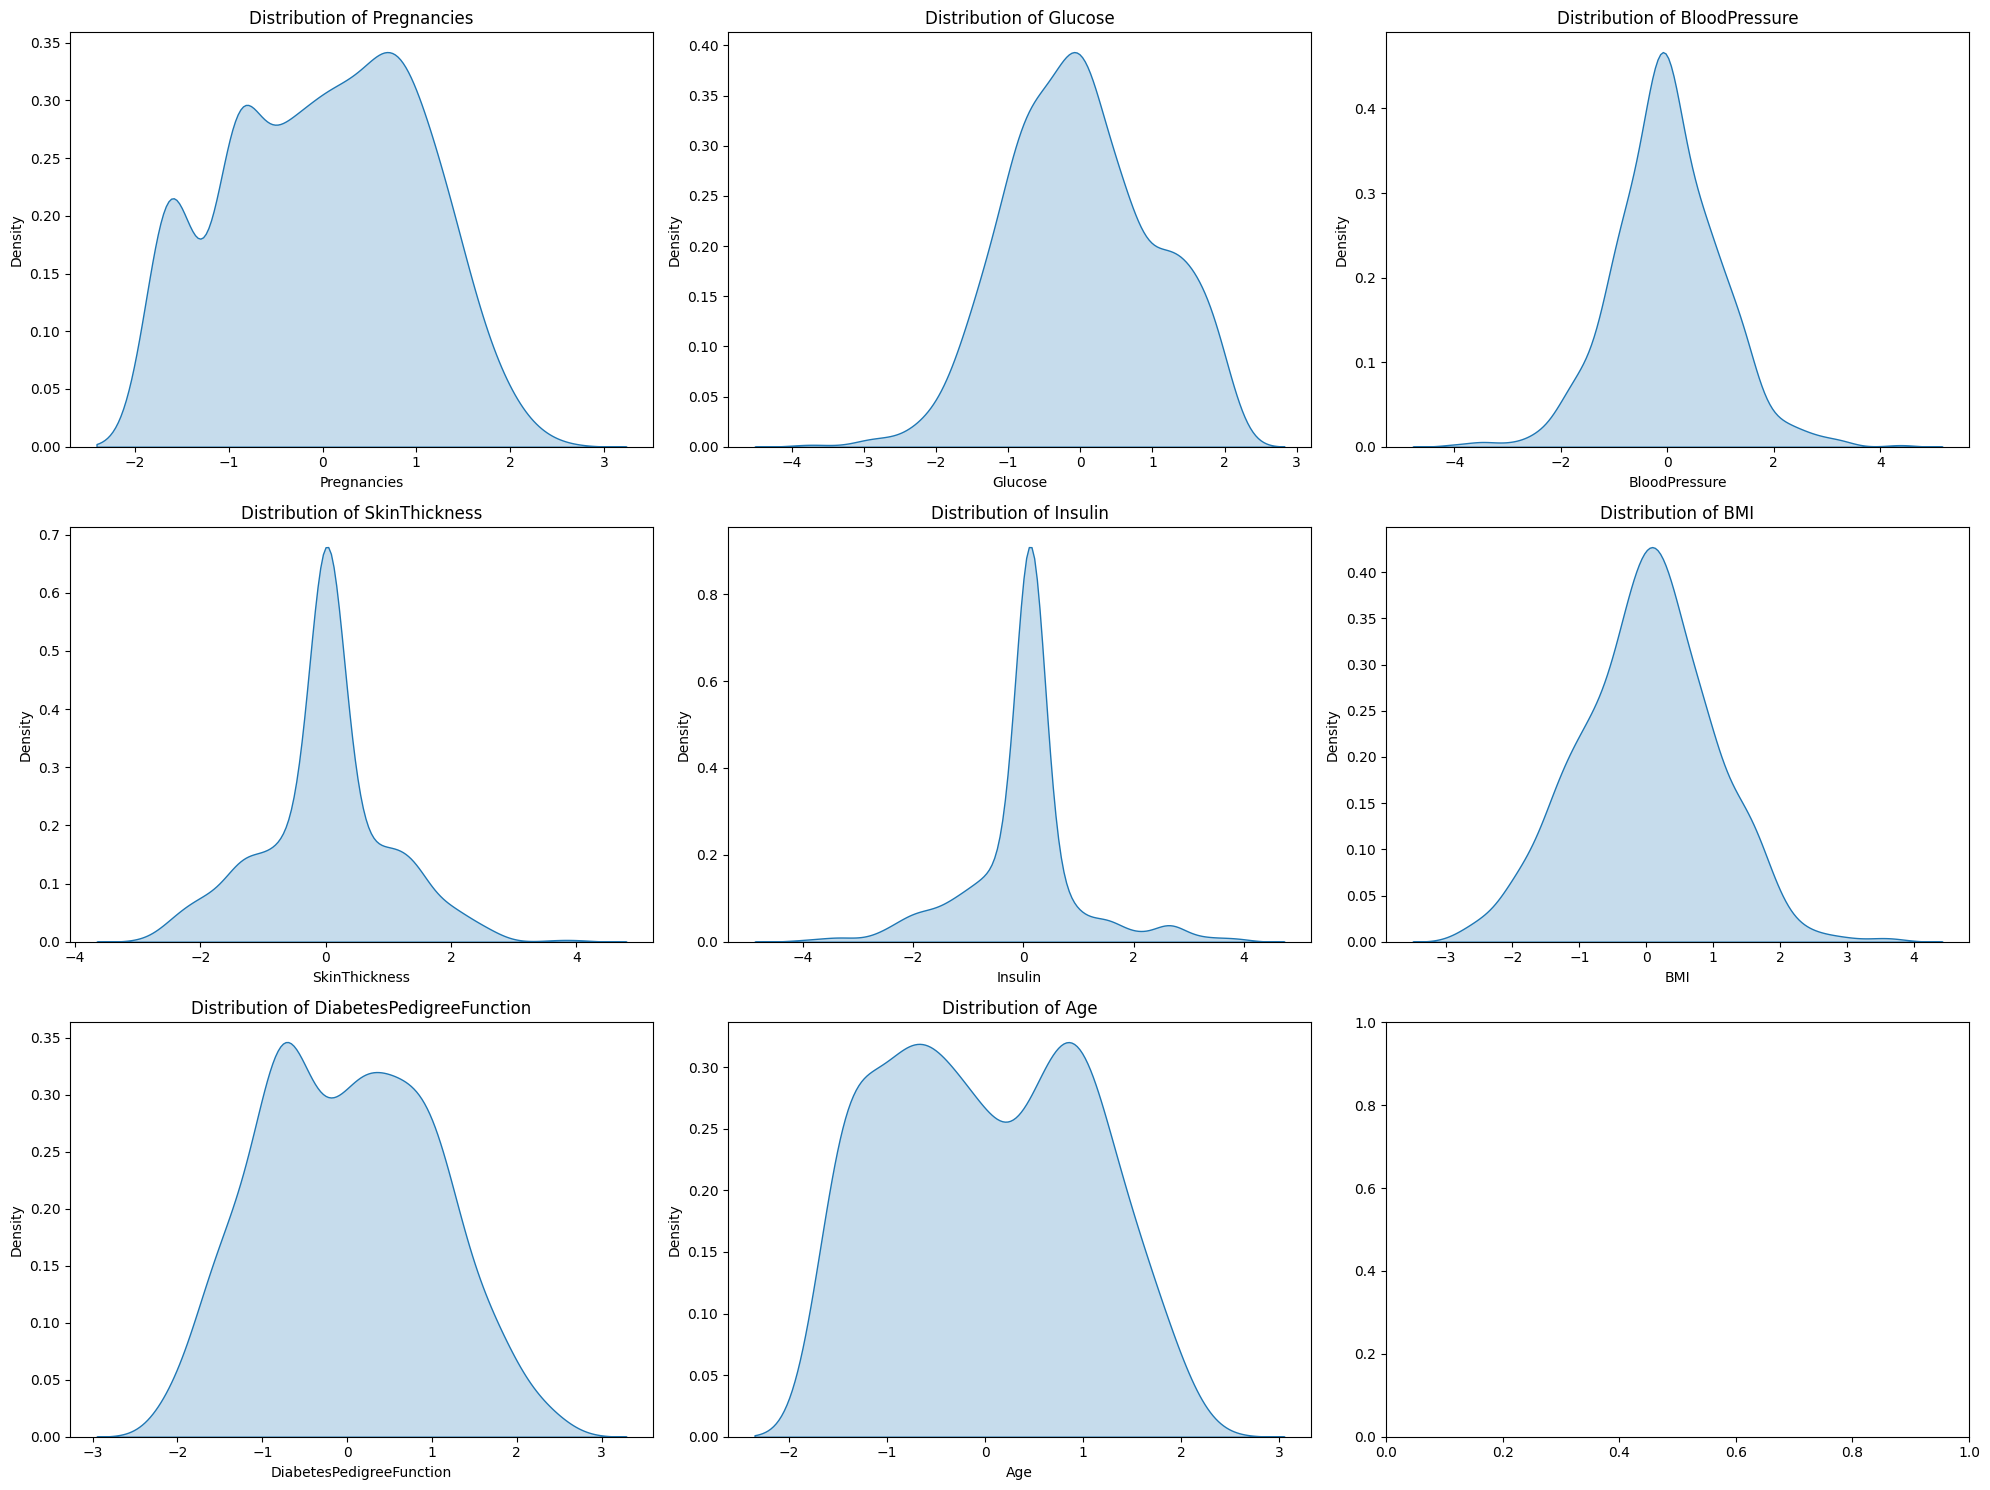

In [78]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# Plot distribution curves for each feature
for i, col in enumerate(X_transformed.columns):
    sns.kdeplot(data=X_transformed, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [80]:
model1=model = LogisticRegression()  # Adjust C for regularization
model2=GradientBoostingClassifier()
model3=RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)

In [82]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter distribution
param_dist = {
    'n_estimators': [100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, None],
    'max_features': ['sqrt', 'log2', 0.75],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_robust, y_train_resampled)

# Best model
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}


In [84]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train the Random Forest Classifier with optimal parameters
rf_model = RandomForestClassifier(
    n_estimators=150,      # Optimal number of trees
    criterion='entropy',   # Criterion for split
    max_depth=15,          # Maximum depth
    max_features=0.75,     # Fraction of features considered
    min_samples_leaf=2,    # Minimum samples per leaf
    min_samples_split=3,   # Minimum samples per split
    random_state=42        # For reproducibility
)

# Fit the model on the training data
rf_model.fit(X_robust, y_train_resampled)

# Predict on the training and testing sets
train_predictions = rf_model.predict(X_robust)
test_predictions = rf_model.predict(x_test_transformed)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")




Training Accuracy: 0.9900
Testing Accuracy: 0.7013


In [85]:
# Save the trained model to a pickle file
model_filename = "random_forest_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl
